In [0]:
from keras.models import Sequential   # intialize Artificial neural networks (ANN)
from keras.layers import Dense # tells us the number of layers
from sklearn.model_selection import  train_test_split # allows us to split our data into training and test sets
from sklearn.preprocessing import MinMaxScaler #to scale the data
import matplotlib.pyplot as plt # visualize the data
import pandas as pd



In [7]:
# from google.colab import files
# uploaded = files.upload()

MessageError: ignored

In [10]:
df = pd.read_csv("HousePriceData.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [12]:
 # convert out data into an array

dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
# split the data into depended and independent
x = dataset[:, 0:10] # get all rows from colums 1-10

y =  dataset[:, 10] # get all the rows from coulum 10 only

In [19]:
 # use min- max scaller for preprocessing whihc scales the dataset.
 # this way all the features lie btween 0 and 1 inclusive 

min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
print(x_scale)

[[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


In [25]:
# split the data into train (80%),test (10%)  and validation (10%)

x_train, x_test_val,y_train, y_test_val = train_test_split(x_scale,y,test_size=.2)
x_val, x_test, y_val, y_test = train_test_split(x_test_val,y_test_val, test_size = .5)

# the training set has 1168 data points while the validation and test set have 146 data points each.
#the x variables have 10  inpute features

print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


In [0]:
#build the model and the deep neural network

model = Sequential() # initialize ann
model.add(Dense(units=32, activation='relu',input_dim=10 ))   ## add a layer, unites are number of neurons, imput is the features 
model.add(Dense(units=32, activation='relu'))  
model.add(Dense(units=32, activation='relu'))   
model.add(Dense(units=1, activation='sigmoid'))   




In [33]:
help(compile)

Help on built-in function compile in module builtins:

compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1)
    Compile source into a code object that can be executed by exec() or eval().
    
    The source code may represent a Python module, statement or expression.
    The filename will be used for run-time error messages.
    The mode must be 'exec' to compile a module, 'single' to compile a
    single (interactive) statement, or 'eval' to compile an expression.
    The flags argument, if present, controls which future statements influence
    the compilation of the code.
    The dont_inherit argument, if true, stops the compilation inheriting
    the effects of any future statements in effect in the code calling
    compile; if absent or false these statements do influence the compilation,
    in addition to any features explicitly specified.



In [56]:
#
model.compile(optimizer='sgd', # tries to improve the model
              loss='binary_crossentropy', # checks how well the models does with the training
              metrics =["accuracy"])
model

In [57]:
# now we train our model

hist = model.fit(
      x_train,y_train,
      batch_size=32, epochs=100,    #epoch is how many times we will run it.
      validation_data= (x_val, y_val) #validation will  show us how our training does compared to validatio.
)

Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 0s 104us/step - loss: 0.6794 - accuracy: 0.5000 - val_loss: 0.6825 - val_accuracy: 0.4589
Epoch 2/100
1168/1168 [==============================] - 0s 38us/step - loss: 0.6732 - accuracy: 0.5274 - val_loss: 0.6768 - val_accuracy: 0.5274
Epoch 3/100
1168/1168 [==============================] - 0s 38us/step - loss: 0.6667 - accuracy: 0.6481 - val_loss: 0.6705 - val_accuracy: 0.6370
Epoch 4/100
1168/1168 [==============================] - 0s 38us/step - loss: 0.6597 - accuracy: 0.6952 - val_loss: 0.6637 - val_accuracy: 0.6507
Epoch 5/100
1168/1168 [==============================] - 0s 38us/step - loss: 0.6522 - accuracy: 0.7235 - val_loss: 0.6561 - val_accuracy: 0.6712
Epoch 6/100
1168/1168 [==============================] - 0s 38us/step - loss: 0.6438 - accuracy: 0.7483 - val_loss: 0.6484 - val_accuracy: 0.6918
Epoch 7/100
1168/1168 [==============================] - 0s 42us/step - loss

In [43]:
# evalute our model

model.evaluate(x_test, y_test)[1] # the 1 is for the accuracy, which is the second element on position 1



146/146 [==============================] - 0s 75us/step


0.9041095972061157

In [50]:
# make a prediction
# if the score is above 90% returns 1 or else returns 0

prediction = model.predict(x_test)
prediction = [1 if y >=.90 else 0 for y in prediction]
print(prediction)
print("\n", y_test)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

 [0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1]


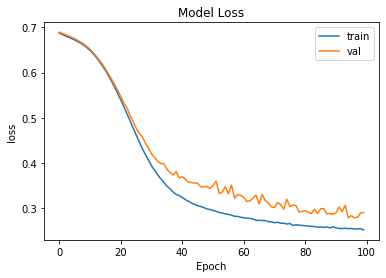

In [53]:
#visualize the training loss and the validation loss to see if the model is overfitting

# looks like our model is not over fitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="upper right")



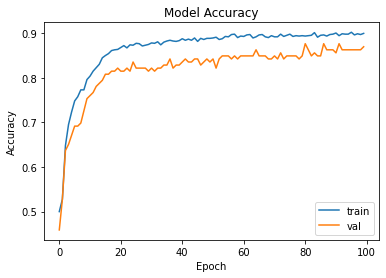

In [60]:
# visual like the traing accurasy 

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="lower right")
